<h2><center>"Portfolio models' research. CAPM model"</center></h2>
<h4><center>by Turkunov Y. (turkunov @ GitHub)</center></h4>

<br />
<h4><center><b>Abstract</b></center></h4>
<center>
The topic of investing has seen a rapid rise of popularity in the past decade, therefore many models for more efficient stocks portfolio management are still being introduced by researchers. Many of them rely on very complex algorithms that tend to work poorly under unexpected conditions of the market. One of the simpliest and very powerful models that works well under these conditions is the single-factor Capital Asset Pricing Model (CAPM). It takes into account volatility of governmental bonds that show really well trends on the market. In this paper CAPM model's capabilities are going to be demonstrated using popular Python packages related to statistics.
</center>

#### 1. **Introduction**
Over the past few years, the popularity of the topic of investment has greatly increased. Over the past decade, not only has the existing methods of interaction with exchanges been modernized, the procedure for taking part in securities purchase transactions for ordinary people has been simplified, but a completely new financial asset has appeared – cryptocurrency. These events determine the urgency of the problem of forming and analyzing an investment portfolio – one of the main tools for managing shares of purchased securities for subsequent sale and profiting from them.

#### **2. Theoretical basis of single-factor models**
#### 2.1 Single-factor models
To assess the effectiveness of investment portfolios, profitability models are used, within the framework of which regression equations are constructed, where the profitability of the studied asset is taken as an endogenous variable, and any random factors are taken as exogenous variables. Usually, these factors are the profitability of other assets or the market index. The most common is the one-factor yield model, where, as the name implies, the influence of only one random factor F on the yield R of some security is considered: $$R\ =\alpha+\ \beta F\ +\ \epsilon$$ 
where $\epsilon$ is a residual, $\alpha$, $\beta$ are constants selected as a result of using the OLS method with the minimization of SSE.

#### 2.2 Single-factor CAPM model
One of the most common and popular methods of evaluating the effectiveness of investments in an asset is the CAPM (Capital Asset Price Model). Within the framework of this model, we compile a linear function of the dependence of the expected yield of the studied asset I, which is planned to be added to the portfolio M, on some risk-free asset F, which is usually used as government bonds with fairly low interest payments, but practically zero risk of default. The CAPM formula looks like this:
$$E\left(R_i\right)=R_f+\beta_i\left[E\left(R_m\right)-R_f\right]$$
where:
* $R_i$ - expected return of the asset $I$
* $R_f$ - expected return on a risk-free asset
* $\beta_{i}$ - covariance of a security with a market asset
* $E\left(R_m\right)-R_f$ - risk premium, that is, the additional income of the investor, which he received as compensation for taking additional risk

#### **3.	Regressional analysis of the CAPM model**
#### 3.1. Preparing the data
To study the CAPM model, we will use the Python programming language and consider real data for each month between January 2020 and November 2022, in particular coupons (interest payments) on US government bonds and yields (ROI) on shares of Google, Microsoft and Tesla. To get data about shares prices we will use the Yahoo!finance API using the `yfinance`.

In [ ]:
!pip install yfinance

We will receive data on coupons on government bonds from the official website of the US Treasury, which provides a free and very easy-to-use REST API: https://fiscaldata.treasury.gov/. Then we will load this data into a table, which we will call `yield_`.

In [2]:
# Feb 1 2012 till Dec 1 2022
import requests
import pandas as pd

url = 'https://api.fiscaldata.treasury.gov/services/api/fiscal_service/v2/accounting/od/avg_interest_rates?page[size]=2166&&filter=record_date:gte:2012-01-01'
fiscdata = requests.get(url).json()
yeild_ = pd.DataFrame(fiscdata['data'])
yeild_ = yeild_[(yeild_['security_desc'] == 'Treasury Bonds') & (yeild_['security_type_desc'] == 'Marketable')][['record_date','avg_interest_rate_amt']]
yeild_['record_date'] = pd.to_datetime(yeild_['record_date']) + pd.Timedelta(days=1)
yeild_['avg_interest_rate_amt'] = pd.to_numeric(yeild_['avg_interest_rate_amt'])
yeild_

,record_date,avg_interest_rate_amt
2,2012-02-01,5.619
18,2012-03-01,5.581
34,2012-04-01,5.554
57,2012-05-01,5.523
66,2012-06-01,5.488
...,...,...
2083,2022-08-01,3.004
2100,2022-09-01,2.997
2117,2022-10-01,3.001
2134,2022-11-01,3.009


Then we will upload stock price data. January 1, 2019 will be set as the starting date, in order to then calculate the return on shares for the month of February.

In [3]:
# loading data on Google, Microsoft and Tesla

import yfinance as yf
from datetime import datetime, timedelta

tickers = 'GOOGL MSFT TSLA'
data = yf.download(tickers, start=datetime(2012,1,1), end=datetime(2022,12,2), interval='1mo')
data.tail()

[*********************100%***********************]  3 of 3 completed


Adj Close                               Close               
                 GOOGL        MSFT        TSLA       GOOGL        MSFT   
Date                                                                     
2022-08-01  108.220001  258.966797  275.609985  108.220001  261.470001  \
2022-09-01   95.650002  231.159897  265.250000   95.650002  232.899994   
2022-10-01   94.510002  230.395676  227.539993   94.510002  232.130005   
2022-11-01  100.989998  253.233734  194.699997  100.989998  255.139999   
2022-12-01   88.230003  238.699020  123.180000   88.230003  239.820007   

                              High                                 Low   
                  TSLA       GOOGL        MSFT        TSLA       GOOGL   
Date                                                                     
2022-08-01  275.609985  122.430000  294.179993  314.666656  107.800003  \
2022-09-01  265.250000  111.620003  267.450012  313.799988   95.559998   
2022-10-01  227.539993  104.820000  251.039993  257.500000   91.800003   
2022-11-01  194.699997  101.040001  255.330002  237.399994   83.339996   
2022-12-01  123.180000  102.250000  263.920013  198.919998   85.940002   

                                          Open                           
                  MSFT        TSLA       GOOGL        MSFT        TSLA   
Date                                                                     
2022-08-01  260.660004  271.809998  115.300003  277.820007  301.276672  \
2022-09-01  232.729996  262.470001  108.279999  258.869995  272.579987   
2022-10-01  219.130005  198.589996   96.760002  235.410004  254.500000   
2022-11-01  213.429993  166.190002   95.449997  234.600006  234.050003   
2022-12-01  233.869995  108.239998  101.019997  253.869995  197.080002   

               Volume                         
                GOOGL       MSFT        TSLA  
Date                                          
2022-08-01  515852700  477157600  1695263200  
2022-09-01  613278900  575586600  1299271000  
2022-10-01  681488300  671225100  1735263100  
2022-11-01  716522700  615296000  1885275300  
2022-12-01  603127800  591358700  2944247700

In [4]:
data.head()

Adj Close                           Close                        
                GOOGL       MSFT      TSLA      GOOGL       MSFT      TSLA   
Date                                                                         
2012-01-01  14.517267  23.569242  1.938000  14.517267  29.530001  1.938000  \
2012-02-01  15.471722  25.333139  2.227333  15.471722  31.740000  2.227333   
2012-03-01  16.047047  25.917688  2.482667  16.047047  32.259998  2.482667   
2012-04-01  15.136386  25.724869  2.208667  15.136386  32.020000  2.208667   
2012-05-01  14.536036  23.451244  1.966667  14.536036  29.190001  1.966667   

                 High                             Low                        
                GOOGL       MSFT      TSLA      GOOGL       MSFT      TSLA   
Date                                                                         
2012-01-01  16.773024  29.950001  2.000000  14.127878  26.389999  1.509333  \
2012-02-01  15.655656  32.000000  2.331333  14.492993  29.709999  1.933333   
2012-03-01  16.481232  32.950001  2.663333  14.860861  31.490000  2.174667   
2012-04-01  16.344845  32.889999  2.564667  14.769770  30.230000  2.066667   
2012-05-01  15.962212  32.340000  2.312000  14.489489  28.639999  1.788667   

                 Open                           Volume                         
                GOOGL       MSFT      TSLA       GOOGL        MSFT       TSLA  
Date                                                                           
2012-01-01  16.339840  26.549999  1.929333  2942758296  1354858100  384148500  
2012-02-01  14.638138  29.790001  1.938000  1892689416   984332300  347904000  
2012-03-01  15.572072  31.930000  2.234000  1891314792   942366500  332452500  
2012-04-01  16.035286  32.220001  2.488667  2352752892   940739700  341293500  
2012-05-01  15.109860  32.049999  2.208667  2344585068  1014372600  512779500

For research, we will need the `Adj Close` column, which stores closing prices, taking into account dividend payments and other costs. After that, using this column, we will calculate the percentage change between months using `pct_change()` and get rid of the first row, since it is impossible to calculate the change relative to the previous value for it. The resulting array will be called `roi` for Returns On Investment.

In [5]:
roi = data['Adj Close'].pct_change().dropna().reset_index()
roi.head()

,Date,GOOGL,MSFT,TSLA
0,2012-02-01,0.065746,0.074839,0.149295
1,2012-03-01,0.037186,0.023074,0.114637
2,2012-04-01,-0.056749,-0.007440,-0.110365
3,2012-05-01,-0.039663,-0.088382,-0.109568
4,2012-06-01,-0.001360,0.054838,0.060678


We then combine `roi` and US bond's `yield_` into a single table: `roi_and_yield`.

In [6]:
roi_and_yield = roi.merge(yeild_, left_on='Date', right_on='record_date')[['Date', 'GOOGL', 'MSFT', 'TSLA', 'avg_interest_rate_amt']]
roi_and_yield.columns = ['Date', 'GOOGL', 'MSFT', 'TSLA', 'US bond yeild']
roi_and_yield.head()

,Date,GOOGL,MSFT,TSLA,US bond yeild
0,2012-02-01,0.065746,0.074839,0.149295,5.619
1,2012-03-01,0.037186,0.023074,0.114637,5.581
2,2012-04-01,-0.056749,-0.007440,-0.110365,5.554
3,2012-05-01,-0.039663,-0.088382,-0.109568,5.523
4,2012-06-01,-0.001360,0.054838,0.060678,5.488


#### 3.2. Creating a portfolio
For the sake of demonstration a following example portfolio will be formed:
* Google (GOOGL) will make up 25% of the portfolio
* Microsoft (MSFT) will make up 35% of the portfolio
* Tesla (TSLA) will make up 40% of the portfolio

After that, we will calculate for each the market expected return of our portfolio $R_m=\sum_{i=1}^{3}x_i\times\mu_i$, where $x_i$ is the share of the $i$-th share in the portfolio, and $\mu_i$ is its yield. For the vector of the resulting yield values, we will form a column `mu_m` in the existing table.

In [7]:
import numpy as np

volumes = np.array([0.25, 0.35, 0.4])
roi_and_yield['mu_m'] = np.sum(roi_and_yield[['GOOGL','MSFT','TSLA']] * volumes, axis=1)
roi_and_yield['US bond yeild'] = roi_and_yield['US bond yeild'] * .01
roi_and_yield.head()

,Date,GOOGL,MSFT,TSLA,US bond yeild,mu_m
0,2012-02-01,0.065746,0.074839,0.149295,0.05619,0.102348
1,2012-03-01,0.037186,0.023074,0.114637,0.05581,0.063227
2,2012-04-01,-0.056749,-0.007440,-0.110365,0.05554,-0.060937
3,2012-05-01,-0.039663,-0.088382,-0.109568,0.05523,-0.084677
4,2012-06-01,-0.001360,0.054838,0.060678,0.05488,0.043124


After calculating the yields of $R_m$, risk premium for each month will be calculating using the difference of the vectors `mu_m` (portfolio yields) and `US bond yeild` (risk-free interest rates). For the resulting vector, we will form column called `premium`.

In [8]:
roi_and_yield['premium'] = roi_and_yield['mu_m'] - roi_and_yield['US bond yeild']
roi_and_yield.head()

,Date,GOOGL,MSFT,TSLA,US bond yeild,mu_m,premium
0,2012-02-01,0.065746,0.074839,0.149295,0.05619,0.102348,0.046158
1,2012-03-01,0.037186,0.023074,0.114637,0.05581,0.063227,0.007417
2,2012-04-01,-0.056749,-0.007440,-0.110365,0.05554,-0.060937,-0.116477
3,2012-05-01,-0.039663,-0.088382,-0.109568,0.05523,-0.084677,-0.139907
4,2012-06-01,-0.001360,0.054838,0.060678,0.05488,0.043124,-0.011756


#### 3.3. The reason behind the relation between premium and profitability
Before performing an actual regression analysis, it is necessary to make sure of the general logical conditionality of the data. Following a distribution between the premium and the returns on company shares it becomes clear that with an increase in the premium, the yield on shares also increases. This relation must be present, since an increase in the premium indicates an increase in risk, which should, in its turn, lead to greater profitability. Otherwise, the investment would be unprofitable.

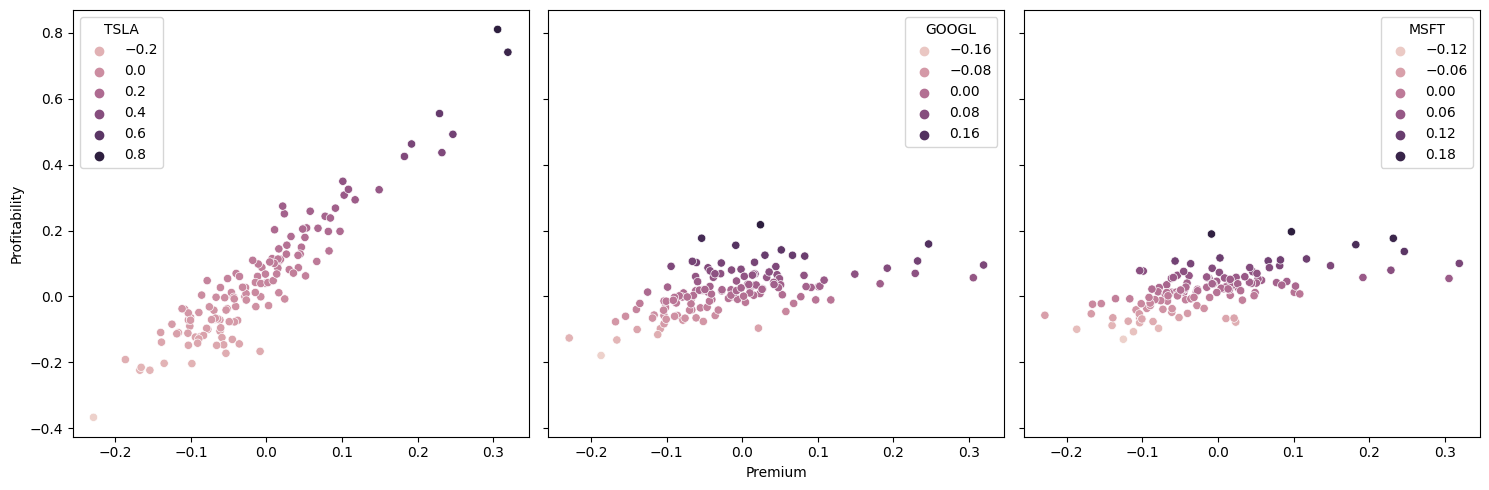

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
first_scatter = sns.scatterplot(x=roi_and_yield['premium'], y=roi_and_yield['TSLA'], hue=roi_and_yield['TSLA'], ax=axs[0])
first_scatter.set(xlabel=None, ylabel='Profitability')
second_scatter = sns.scatterplot(x=roi_and_yield['premium'], y=roi_and_yield['GOOGL'], hue=roi_and_yield['GOOGL'], ax=axs[1])
second_scatter.set(xlabel='Premium')
third_scatter = sns.scatterplot(x=roi_and_yield['premium'], y=roi_and_yield['MSFT'], hue=roi_and_yield['MSFT'], ax=axs[2])
third_scatter.set(xlabel=None)
fig.tight_layout()

#### 3.4. Building regression model with its quality assesment

In [ ]:
!pip install sklearn 

First, we can denote the premium (`premium`) for an exogenous variable and the expected return of a stock (for example, shares of Tesla (TSLA)) for an endogenous one.

In [9]:
y = roi_and_yield['TSLA'] 
x = roi_and_yield['premium']

Before passing anything to the model however, we'll also need to split data into training and test sets:

In [55]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x.to_numpy().reshape(-1,1), y.to_numpy().reshape(-1,1), test_size=.15, random_state=123)
print(x_train.shape, y_test.shape)

(111, 1) (20, 1)


Initialize constant values, namely:
* `m` is the number of exogenous variables
* `n` is the number of observations
* `df_` - number of degrees of freedom
* `alpha_level` - significance level
* `tCrit` - T statistic for the significance level of `alpha_level` and `df_` degrees of freedom
* `fCrit` - F statistic for the significance level `alpha_level`, `m` of the number of exogenous observations and `df_` degrees of freedom

In [56]:
import scipy.stats as sps

m = 1 
n = x_train.shape[0]
df_ = n - m - 1
alpha_level = 0.05
tCrit = sps.t.ppf(1-alpha_level/2, df_)
fCrit = sps.f.ppf(1-alpha_level, m, df_)

Then we must ensure the significance of the correlation coefficient between X and Y. To do this, using the `numpy` package, we will build a correlation matrix, take the paired correlation coefficient from it, calculate the value of T statistic by the formula: $\frac{\sqrt{\rho*(n-2)}}{\sqrt{(1-\rho^2)}}$, where $\rho$ is the correlation coefficient between X and Y.

In [57]:
import numpy as np

rho_corr = np.corrcoef(roi_and_yield['TSLA'], roi_and_yield['premium'])[0,1]
tst = rho_corr*(n-2)**0.5/(1-rho_corr**2)**0.5
rho_corr_significance = {'tstat': tst, 'tcrit': tCrit, 'statistical significance': tst > tCrit}
rho_corr_significance

{'tstat': 28.807953775634147,
 'tcrit': 1.981967489688474,
 'statistical significance': True}

#### 3.5. CAPM regression model. Assesment using $MSE$ and $R^2$
Since the `statsmodels` package provide a more detailed feedback on the model we can first initialize a model using `OLS()`.

In [ ]:
%pip install statsmodels

In [36]:
import statsmodels.api as sm

X = sm.add_constant(x_train)
reg = sm.OLS(y_train, X).fit()
b0, b1 = reg.params
yHat = np.vectorize(lambda vect: vect*b1 + b0)
yHatText = f'y^ = {round(b0,5)} + {round(b1,5)}*x'

In [37]:
yHatText # equation

'y^ = 0.07155 + 1.92385*x'

In [38]:
b0, b1 # coefficients

(0.07155255124075346, 1.923846331395721)

As a result of using the least squares method, we will find the coefficients of the linear regression equation: $b_0=0.07155255124075346$ and $b_1=1.923846331395721$. Thus, the linear regression equation will look like this: $\bar{y}=0.07155255124075346+1.923846331395721\times x$, where $\bar{y}$ is the expected return of the stock $E(R_i)$, and $x$ is the risk premium. This equation can be also explained as follows: "with an increase in the premium by 1%, the expected return is $E(R_i)$ will increase by ~1.92%." Using this equation, we will be able to estimate how profitable an investment in an asset $R_i$ will be. However, for the direct application of this model, it is necessary to evaluate the estimates obtained as a result of the OLS using the Gauss-Markov theorem. Before checking the criteria, we will additionally build a regression model using another package - `sklearn`.

0.004124667166650152 0.8890202205455517 [[1.92384633]]


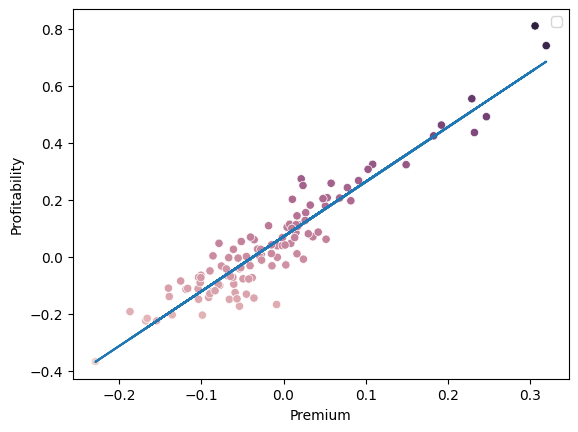

In [52]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

reg_sklearn = LinearRegression()
reg_sklearn.fit(x_train, y_train)
yPredicted = reg_sklearn.predict(x_train)
print(mean_squared_error(y_train, yPredicted), r2_score(y_train, yPredicted), reg_sklearn.coef_)
yPredicted = yPredicted.reshape(1,-1)[0]
sns.scatterplot(x=x_train.reshape(1,-1)[0], y=y_train.reshape(1,-1)[0], hue=y_train.reshape(1,-1)[0])
plt.plot(x_train,yPredicted)
plt.xlabel('Premium')
plt.ylabel('Profitability')
plt.legend([])

0.0032094868049421603 0.8117241045992285


Text(0, 0.5, 'Profitability')

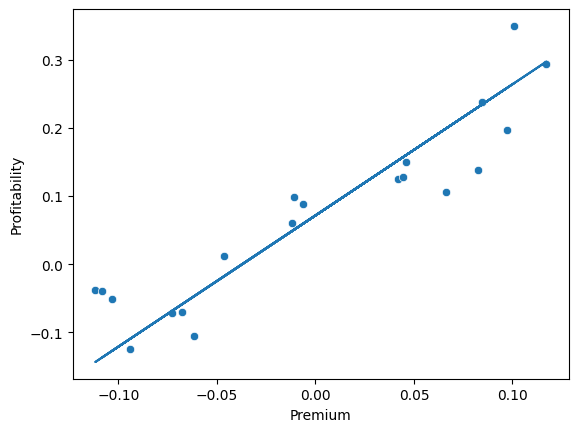

In [54]:
yPredicted_test = reg_sklearn.predict(x_test)
print(mean_squared_error(y_test, yPredicted_test), r2_score(y_test, yPredicted_test))
yPredicted = yPredicted_test.reshape(1,-1)[0]
sns.scatterplot(x=x_test.reshape(1,-1)[0], y=y_test.reshape(1,-1)[0])
plt.plot(x_test,yPredicted)
plt.xlabel('Premium')
plt.ylabel('Profitability')

As a result of using the `sklearn` package, we got the same coefficients of the regression equation. Additionally, before evaluating the statistical significance of the equation, we will evaluate the quality of predictions using metrics $MSE$ and $R^2$ on the training set:
* $MSE_{\text{train}}=0.004124667166650152$
* $R^2_{\text{train}}=0.8890202205455517$

And on the test set of data:
* $MSE_{\text{test}}=0.0032094868049421603$
* $R^2_{\text{test}}=0.8117241045992285$

Both metrics for training and test sets showed pretty good results. We will also build a graph on which we will depict the linear regression function and the distribution of profitability with a premium. As a result of plotting, you can also make sure that the regression equation follows a trend pretty good.

After performing additional calculations, we will determine new constant values:
* `ei` - residuals
* `FSTs` - F statistics, which we later use to evaluate the statistical significance of the equation
* `paramsSignificances` - T statistics for each coefficient of the regression equation for subsequent evaluation of their statistical significance

In [65]:
ei = reg.resid
fSts = reg.fvalue 
paramsSignificances = reg.tvalues

#### 3.6. Assessment of coefficients of the regression equation
As a result of comparing each with $T_{crit}$, we get that both coefficients $b_0$ with $T_{stat}=12.808381$ and $b_1$ with $T_{stat}=30.958976$ are statistically significant.

In [60]:
paramsSignificances

array([11.48265674, 29.54929609])

In [61]:
paramsSignificances > tCrit

array([ True,  True])

#### 3.7. Estimating equation's statistical significance and approximation error
In order to determine the statistical significance of the linear regression equation, it is necessary to compare F statistic with the critical value. Since the F-statistic of the equation is greater than the critical value, the resulting equation is statistically significant.

In [62]:
modelSignificance = {'fSts': fSts, 'fCrit': fCrit, 'significant': fSts > fCrit}
modelSignificance

{'fSts': 873.1608993622046, 'fCrit': 3.928195130372311, 'significant': True}

For an additional estimation of the equation's significance, we find the approximation error $\hat{A}=\frac{\sum_{i=1}^{n}\lvert \frac{e_i}{y_i} \rvert}{n}$. It will be equal to $1.822396737683716$. Since the resulting error is not included in the interval [5, 7], it once again confirms that the model can be used for predictions.

In [23]:
approxErr = 1/n * np.abs(ei/y).sum()
approxErr

1.822396737683716

#### 3.8. **Gauss-Markov assumptions**
##### 3.8.1. Normal distribution of residuals
To begin with, it is necessary to verify the first and last assumptions by checking the normality of the distribution of residuals using the Shapiro-Wilk goodness-of-fit test:

In [63]:
# critical values are taken from table D5: https://www.epa.gov/sites/default/files/2015-10/documents/monitoring_appendd_1997.pdf

eiNormTest = sps.shapiro(ei)
eiNormTest.pvalue

0.3747401535511017

##### 3.8.2. Residuals' heteroscedasticity
Based on Shapiro Wilk test for normality we can see that the distribution of $e_i$ follows a normal one. Now we can check the heteroscedasticity of residuals using 4 different approaches:
* graphical
* Goldfeld-Quandt test
* Breusch-Pagan test
* Spirman test

We will plot a joint distribution of $x$ и $e_i^2$ for the graphical test and see if there's any relation between them on the graph that can show a sign of heteroscedasticity:

Text(0.5, 1.0, 'Distribution of $x$ and $e_i^2$')

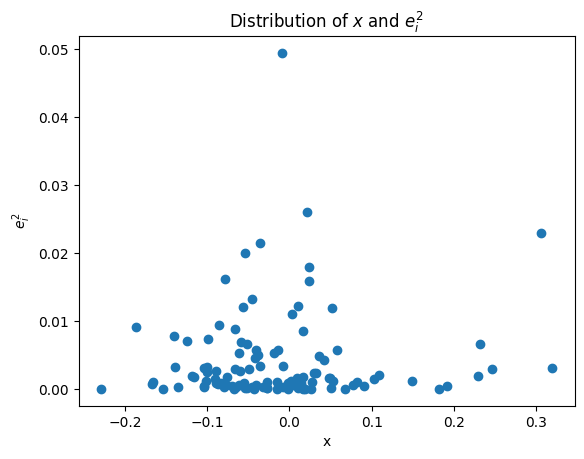

In [66]:
fig_hty, ax_hty = plt.subplots(1,1)
ax_hty.scatter(x_train,ei**2)
ax_hty.set_xlabel("x")
ax_hty.set_ylabel("$e_i^2$")
ax_hty.set_title('Distribution of $x$ and $e_i^2$')

By plotting a joint distribution we can confirm that there is no visible heteroscedasticity. Then we'll proceed to applying Goldfeld-Quandt test for heteroscedasticity:

In [69]:
from statsmodels.stats.diagnostic import het_goldfeldquandt

fStsGQ = het_goldfeldquandt(y_train,x_train)[0] 
htyGoldfeldQuandtTest = {'fSts': fStsGQ, 'fCrit': fCrit, 'heteroscedasticity in residuals': fStsGQ > fCrit}
htyGoldfeldQuandtTest

{'fSts': 1.1315360155962075,
 'fCrit': 3.928195130372311,
 'heteroscedasticity in residuals': False}

Goldfeld-Quandt test once again confirms that there's no proof of heteroscedasticity present in residuals. Same can be confirmed after applying Breusch-Pagan test when we once again decline $H_0$ hypothesis:

In [70]:
from statsmodels.stats.diagnostic import het_breuschpagan

fStsBP = het_breuschpagan(ei, reg.model.exog)[2]
htyBreuschPaganTest = {'fSts': fStsBP, 'fCrit': fCrit, 'heteroscedasticity in residuals': fStsBP > fCrit}
htyBreuschPaganTest

{'fSts': 0.6414582170886086,
 'fCrit': 3.928195130372311,
 'heteroscedasticity in residuals': False}

Finally we will apply Spirman test for heteroscedasticity:

In [72]:
rho = sps.spearmanr(x_train, ei)[0]
tStsSP = ((rho**2/(1-rho**2))*(len(x_train)-2))**0.5
htySpirmanTest = {'tsts': tStsSP, 'tcrit': tCrit, 'heteroscedasticity in residuals': tStsSP > tCrit}
htySpirmanTest

{'tsts': 0.8278472532725507,
 'tcrit': 1.981967489688474,
 'heteroscedasticity in residuals': False}

Spirman test confirms that $T_{stat} > T_{crit}$. This is why there's ground for rejecting the null hypothesis about heteroscedasticity amongst residuals.

##### 3.8.3. Autocorrelation amongst residuals
Since the research focuses on the single-factor model there is no need to consider multicollinearity. Therefore the last assumption to check is an absence of autocorrelation amongst residuals. We can do that by applying Durbin-Watson test:

In [74]:
from statsmodels.stats.stattools import durbin_watson

dw = durbin_watson(ei)
dw 

2.0402710139140767

As shown above the DW statistic equals to $2.0402710139140767$ which shows that there little to no autocorrelation amongst residuals, therefore all Gauss-Markov assumptions are met confirming that the coeffiecients estimated under OLS method are BLUE. We can see that the CAPM model is not only statistically significant but can also give the least biased estimate based on the premium.

#### 3.9. Using CAPM model for predictions
Now we are predicting the profitability of the shares of Tesla (TSLA) for a specific period, for example - October, 2016. Under the terms of the task, we know the interest on US government bonds in October 2016 and, thus, the premium during this period. To begin with, we will determine the payments on bonds and data on stocks using previously used approaches:

In [75]:
october_filter_url = 'https://api.fiscaldata.treasury.gov/services/api/fiscal_service/v2/accounting/od/avg_interest_rates?page[size]=2166&&filter=record_date:eq:2011-10-31'
yeild_april_data = float(list(filter(lambda record: record['security_desc'] == 'Treasury Bonds', requests.get(october_filter_url).json()['data']))[0]['avg_interest_rate_amt']) * .01 
tsla_april_data = yf.download(tickers, start=datetime(2017,10,1), end=datetime(2017,11,2), interval='1mo')

[*********************100%***********************]  3 of 3 completed


In [76]:
real_change = tsla_april_data['Adj Close'].pct_change().iloc[1,:]
mu_m = np.sum(np.array(volumes) * real_change)
premium = mu_m - yeild_april_data

Now we can use the model for forecasting the shares stock price:

In [77]:
change_forecast = yHat(premium)

In [80]:
change_forecast

array(-0.08189523)

We can see that the predicted return and the real return vary by a small fraction of ~3%, which might be considered big in big investment portfolios but is hardly noticable in small ones. The forecasted value is inside the confidence interval `CI`, so, statistically speaking, this deviation is not significant with the confidence of 95%:

In [82]:
real_change['TSLA'], change_forecast

(-0.06841006150168283, array(-0.08189523))

In [81]:
SE = np.std(ei) * np.sqrt(1/n+(premium-x.mean())**2/((n-1)*np.std(x)))
CI = [change_forecast-SE*tCrit,change_forecast+SE*tCrit]
CI

[-0.094268022291958, -0.06952244502359857]

#### **4. Conclusion**
In this paper we've confirmed that the CAPM model, which is a single-factor regression model, can be successfully used for stocks analysis and an estimation of returns in some portfolio. Moreover we've also automated the process of loading, preparing and obtaining a prediction has been automated via popular statistics packages for Python. The research of such models is relevant even today because predictive analysis using technologies provided by modern programming languages can not only greatly increase the efficiency of the process of organizing portfolio investments, but also improve the accuracy of the forecast, which is especially in demand in modern economic conditions.

<br/>
<h4><center><b>References</b></center></h4>

1.	Finance Yahoo! Yahoo Finance - Stock Market Live // Yahoo Finance. - 3 12 2022 / - https://finance.yahoo.com/.

2.	Hao X.Y. Discussion of Theory and Applying of Capital Assets Pricing Models [Article] // Journal of Zhongyuan University of Technology.: Zhongyuan University of Technology, 2002 .

3.	Seaborn Example gallery - seaborn 0.12.1 // Seaborn - statistical data visualization library. - 03 12 2022 . - https://seaborn.pydata.org/examples/index.html.

4.	Treasury US U.S. Treasury Fiscal Data // U.S. Treasury Fiscal Data. - U.S. Federal Government. - 8 12 2022 . - https://fiscaldata.treasury.gov/.

5.	wordlgovernmentbonds United States 1 Month Bond - Historical Data // wordlgovernmentbonds. - 03 12 2022 . - http://www.worldgovernmentbonds.com/bond-historical-data/united-states/1-month/.

